# Problema del viajante de comercio

## Análisis de tiempos

In [21]:
%matplotlib inline
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np
from math import floor

from functools import partial

from tsp_data import tsp_data
from tsp_parser import tsp_parser
from travelling_salesman_path import travelling_salesman_path

In [28]:
base_path = "test_files/"
test_files = ["ex04.tsp", "ex06.tsp", "ex08.tsp", "ex10.tsp", "ex11.tsp", "ex12.tsp", "ex13.tsp", "ex14.tsp", "p01.tsp",
              "ex16.tsp", "gr17.tsp", "ex18.tsp", "ex19.tsp", "ex20.tsp", "gr21.tsp"]

In [29]:
def plot_times(problems, savefig=False):

    x, times, space = [], [], []

    tsp_cost, tsp_path, tsp_mem = 0, [], 0

    def run_tsp_problem(problem):
        tsp_cost, tsp_path, tsp_mem = travelling_salesman_path(problem)
        space.append(tsp_mem)

    image_base_path = 'images/'
    filename = 'tsp'

    for problem in problems:
        print(str(problem.dimension()))
        x.append(problem.dimension())
        timer = timeit.Timer(partial(run_tsp_problem, problem))
        times.append(timer.timeit(1))

    plt.plot(x, times, label = '...')

    plt.title(title)
    plt.ylabel('Tiempo de ejecución [segundos]')
    plt.xlabel('Cantidad de ciudades')
    #plt.legend(loc='upper left', prop={'size': 10})
    if savefig:
        # el nombre del archivo es: tsp_times.png
        plt.savefig(image_base_path + filename + '_times' +'.png', bbox_inches='tight')
    plt.show()
    
    plt.plot(x, space, label = '...')
    plt.title('Espacio consumido')
    plt.ylabel('Espacio utilizado [cantidad de conjuntos]')
    plt.xlabel('Cantidad de ciudades')
    #plt.legend(loc='upper left', prop={'size': 10})
    if savefig:
        # el nombre del archivo es: tsp_space.png
        plt.savefig('images/' + filename + '_space' +'.png', bbox_inches='tight')
    plt.show()

4
6
8
10
11
12
13
14
15
16
17
18
19
20
21


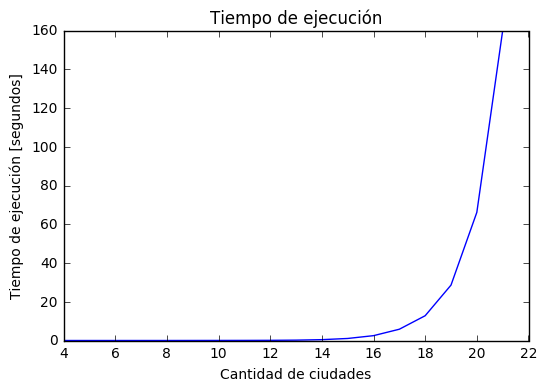

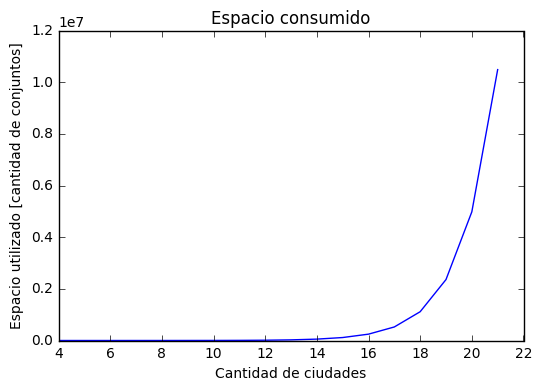

In [30]:
problems = []

for file_name in test_files:
    file_path = base_path + file_name
    problems.append(tsp_parser.parse_tsp_file(file_path))

plot_times(problems, savefig = True)